## REGRESSION MODEL For Building PJMW_MW DATA

##   1.IMPORT LIBRARY

In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('future_df.csv')
df

In [24]:
df1=df.reset_index()["PJMW_MW"]

In [25]:
df1

0         4374.0
1         4306.0
2         4322.0
3         4359.0
4         4436.0
           ...  
143227    6545.0
143228    6496.0
143229    6325.0
143230    5892.0
143231    5489.0
Name: PJMW_MW, Length: 143232, dtype: float64

In [26]:
## see the data by plot()
import matplotlib.pyplot as plt
%matplotlib inline

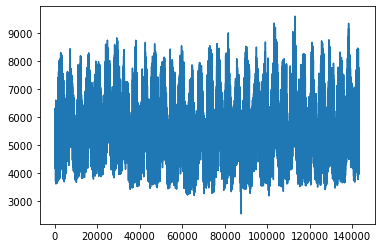

In [27]:
plt.plot(df1)

## DATA PREPROCESSING

In [28]:
df1 = np.array(df1).reshape(-1,1)
df1.shape

(143232, 1)

## Split the data in to 7 days for training and 8 data into output

In [29]:
def create_database(database,time_step =7):
    dataX,dataY =[],[]
    for i in range(len(database)-time_step):
        a= database[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(database[i+time_step,0])
    return np.array(dataX),np.array(dataY)


# TRAIN TEST SPLIT

In [30]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [31]:
training_size,test_size

(100262, 42970)

In [32]:
train_data

array([[4374.],
       [4306.],
       [4322.],
       ...,
       [4888.],
       [4958.],
       [4990.]])

In [33]:
time_step=7
X_train,y_train=create_database(train_data,time_step)
X_test,y_test =create_database(test_data,time_step)

In [34]:
print(X_train.shape), print(y_train.shape)

(100255, 7)
(100255,)


(None, None)

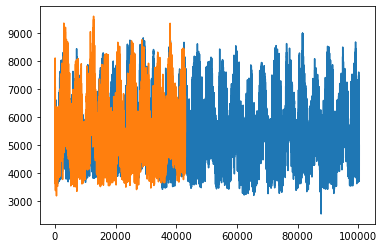

In [35]:
plt.plot(train_data)
plt.plot(test_data)
plt.show()

In [36]:
print(X_test.shape), print(y_test.shape)

(42963, 7)
(42963,)


(None, None)

In [37]:
X_train[0],y_train[0]

(array([4374., 4306., 4322., 4359., 4436., 4723., 5180.]), 5482.0)

In [38]:
X_train[1],y_train[1]

(array([4306., 4322., 4359., 4436., 4723., 5180., 5482.]), 5616.0)

# MODEL BULIDING 

In [39]:
rn_model=RandomForestRegressor(n_estimators=200, random_state=1)
dt_model=DecisionTreeRegressor
()
xgboost_model = xgb.XGBRegressor(n_estimators=200,learning_rate=0.3)

## Model trainning 

In [40]:
rn_model.fit(X_train,y_train)
dt_model.fit(X_train,y_train)
xgboost_model.fit(X_train,y_train)


TypeError: fit() missing 1 required positional argument: 'y'

## Model predction

In [ ]:
## RANDOM FOREST MODEL 
rn_pred=rn_model.predict(X_test)


## Decison TRee MODEL 
DT_pred=dt_model.predict(X_test)


## XGBOOST MODEL
Xg_pred =xgboost_model.predict(X_test)



## Plot between test and predection

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(rn_pred,label='Random forest_Predictions',color='y')
plt.plot(y_test,label='Actual Energy')
plt.legend(loc="upper left")

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(DT_pred,label='Decision Tree_Predictions',color ='g')
plt.plot(y_test,label='Actual Energy')
plt.legend(loc="upper left")


In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(Xg_pred,label='XGboost_Predictions',color='r')
plt.plot(y_test,label='Actual Energy')
plt.legend(loc="upper left")

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(y_test[:30],label='Actual Energy')
plt.plot(rn_pred[:30],label='Random Forest Predection')
plt.plot(DT_pred[:30],label='Decision Tree Energy')
plt.plot(Xg_pred[:30],label='XGboost_Predictions')
plt.legend(loc="upper left")





# Calculate RMSE ,MSE and MAPE Error


In [ ]:
RN_rmse_error = round(rmse(y_test,rn_pred ),4)
RN_mse_error =(RN_rmse_error**2).round(4)
RN_mape=round((mean_absolute_percentage_error(y_test,rn_pred)*100),3)

print(f'MSE Random Forest Error: {RN_mse_error}\nRMSE  random forest Error: {RN_rmse_error}\nMAPE Random Forest: {RN_mape}')

In [ ]:
DT_rmse_error = round(rmse(y_test,DT_pred ),4)
DT_mse_error =(DT_rmse_error**2).round(4)
DT_mape=round((mean_absolute_percentage_error(y_test,DT_pred)*100),3)

print(f'MSE Decision tree Error: {DT_mse_error}\nRMSE Decision tree Error: {DT_rmse_error}\nMAPE Decision tree: {DT_mape}')

In [ ]:
XG_rmse_error = round(rmse(y_test,Xg_pred ),4)
XG_mse_error =(RN_rmse_error**2).round(4)
XG_mape=round((mean_absolute_percentage_error(y_test,Xg_pred)*100),3)

print(f'MSE Xg boost Error: {XG_mse_error}\nRMSE XG boost Error: {XG_rmse_error}\nMAPE XG boost: {XG_mape}')

In [ ]:
f = np.array(df["PJMW_MW"].tail(7))
f

## FUTURE PREDCTION 

In [ ]:
# demonstrate prediction for next 30 days
n_steps =7
x_input = f
energy_input=list(x_input)
lst_output=[]
i=0
while(i<30):
    
    if(len(energy_input)>7):
        x_input=np.array(energy_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps))
        #print(x_input)
        yhat = xgboost_model.predict(x_input)
        print("{} day output {}".format(i,yhat))
        energy_input.append(yhat[0])
        energy_input=energy_input[1:]
        #print(energy_input)
        lst_output.append(yhat[0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = xgboost_model.predict(x_input)
        print(yhat[0])
        energy_input.append(yhat[0])
        lst_output.append(yhat[0])
        i=i+1
    

print(lst_output)

In [ ]:
x_input

In [ ]:
type(lst_output)

In [ ]:
day_new=np.arange(5600,5969)
day_pred=np.arange(5969,5999)


In [ ]:
plt.plot(day_pred,lst_output,color='r',)

In [ ]:
plt.plot(day_new,df['PJMW_MW'][5600:])
plt.plot(day_pred,(lst_output))

In [ ]:
future = pd.date_range('2018-08-04','2018-09-02', freq='D')
future_df = pd.DataFrame(index=future)

In [ ]:
future_df['Future_Energy'] =lst_output
future_df.reset_index()


In [ ]:
future_df.rename(columns={future_df.index[0]:'Datetime'})

In [ ]:
df.plot()
future_df.plot()

### Random forest model predction and future forcasting for 30days

In [ ]:
# demonstrate prediction for next 30 days
n_steps =7
x_input = f
energy_input=list(x_input)
lst_output=[]
i=0
while(i<30):
    
    if(len(energy_input)>7):
        x_input=np.array(energy_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps))
        #print(x_input)
        yhat = rn_model.predict(x_input)
        print("{} day output {}".format(i,yhat))
        energy_input.append(yhat[0])
        energy_input=energy_input[1:]
        #print(energy_input)
        lst_output.append(yhat[0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = rn_model.predict(x_input)
        print(yhat[0])
        energy_input.append(yhat[0])
        lst_output.append(yhat[0])
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(5600,5969)
day_pred=np.arange(5969,5999)
plt.plot(day_new,df['PJMW_MW'][5600:])
plt.plot(day_pred,(lst_output))